Nom 1: Eic Escrich

Nom 2: Adrià Vilariño

# Repte 1: Fashion

## Enunciat
Descarrega el dataset **fashion_mnist** de la secció de datasets de la llibreria TensorFlow i crea una xarxa neuronal capaç d'identificar les diferents peces de roba. Els valors de les etiquetes de sortida corresponen a les següents classes:

>0: T-shirt/top<br>
>1: Trouser<br>
>2: Pullover<br>
>3: Dress<br>
>4: Coat<br>
>5: Sandal<br>
>6: Shirt<br>
>7: Sneaker<br>
>8: Bag<br>
>9: Ankle boot<br>



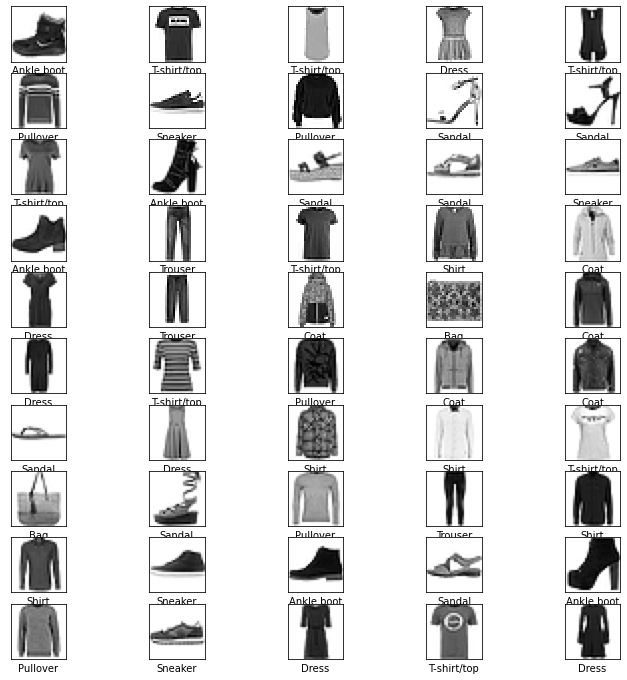

In [ ]:
# Importem llibreries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Descarreguem el dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [2]:
# Creem una llista amb els noms de les peces de roba
roba_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
# Normalitzem dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Comprovem la forma de les dades
print(x_train.shape)
print(y_train.shape)
print(x_train.dtype)
print(y_train.dtype)

(60000, 28, 28)
(60000,)
float32
uint8


In [1]:
# Visualitzem les primeres 50 imatges
# for i in range(50):
#   print(f'{x_train[i]}')
#   print(y_train[i])
#   plt.imshow(x_train[i], cmap=plt.cm.binary)
#   plt.show()

In [ ]:
# Definim el model de xarxa neuronal
# Si fem servir la capa keras.layers.Flatten() ens podem estalviar fer reshape
# de les dades d'entrada
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Mostrem el resum del model creat
model.summary()


c:\Users\Eric Escrich\Desktop\IAB_classe\IAB\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:

# Configurem l'entrenament del nostre model de xarxa neuronal
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Iniciem l'entrenament
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 679us/step - accuracy: 0.6844 - loss: 1.0117
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8229 - loss: 0.5310
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.8366 - loss: 0.4780
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.8448 - loss: 0.4513
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.8504 - loss: 0.4338
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.8549 - loss: 0.4173
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.8603 - loss: 0.4068
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.8643 - loss: 0.3904
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.8666 - loss: 0.3854
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.8690 - loss: 0.3754
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.8708 - loss: 0.3680
Epoch 12

In [6]:
# Evaluem el model amb el conjunt de dades de test
test_lost, test_accuracy = model.evaluate(x_test, y_test)
print('Precisió de test:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.8780 - loss: 0.3366
Precisió de test: 0.8815000057220459


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
prediccio: Trouser
resposta correcte Trouser


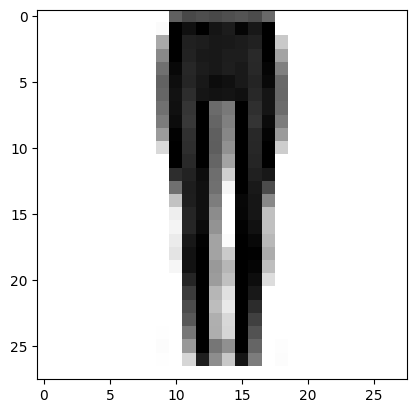

In [7]:
# Mostra la predicció que realitza la Xarxa neuronal de la imatge de test 777,
# la resposta correcta i la imatge corresponent
predictio = model.predict(x_test[777:778])


print('prediccio:', roba_labels[np.argmax(predictio)])
print('resposta correcte', roba_labels[np.argmax(y_test[777])])


plt.imshow(x_test[777].reshape(28, 28), cmap=plt.cm.binary)
plt.show()


## Part opcional 1

In [8]:
# Canvia l'optimitzador del model per tal d'obtenir una xarxa neuronal que
# millori l'encert del model anterior. Pots consultar-los a https://keras.io/api/optimizers/

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=32)
test_lost, test_accuracy = model.evaluate(x_test, y_test)
print('Precisió de test:', test_accuracy)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.8757 - loss: 0.3469
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.8857 - loss: 0.3131
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.8910 - loss: 0.2973
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.8947 - loss: 0.2871
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.8997 - loss: 0.2714
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - accuracy: 0.9061 - loss: 0.2550
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.9086 - loss: 0.2466
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.9117 - loss: 0.2367
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step - accuracy: 0.9157 - loss: 0.2295
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.9166 - loss: 0.2226
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step - accuracy: 0.9175 - loss: 0.2191
Epoch 12

## Part opcional 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


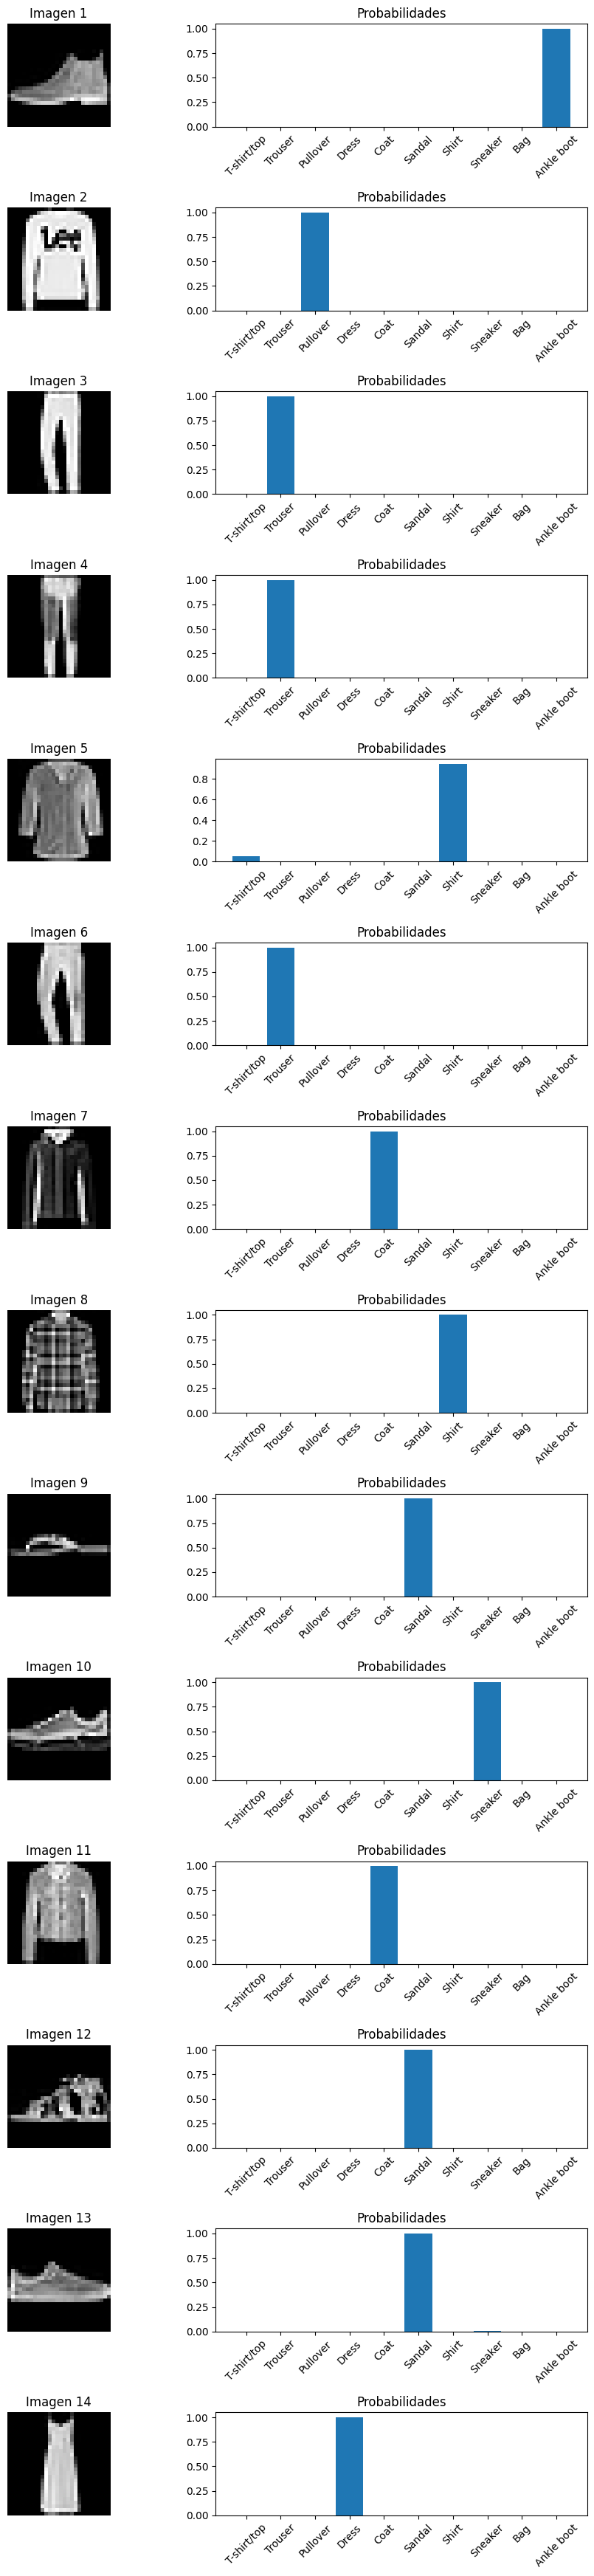

In [9]:
# Mostra les 14 primeres imatges de test, cada una amb un histograma al costat
# on es visualitzi la probabilitat de pertànyer a cada una de les classes

# Realizar predicciones sobre las primeras 14 imágenes de prueba
predictions = model.predict(x_test[:14])

# Crear una figura para mostrar las imágenes y los histogramas
fig, axes = plt.subplots(14, 2, figsize=(10, 35))

for i in range(14):
    # Mostrar la imagen
    axes[i, 0].imshow(x_test[i], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f'Imagen {i+1}')

    # Mostrar el histograma de probabilidades
    axes[i, 1].bar(range(10), predictions[i])
    axes[i, 1].set_xticks(range(10))
    axes[i, 1].set_xticklabels(roba_labels, rotation=45)
    axes[i, 1].set_title('Probabilidades')

plt.tight_layout()
plt.show()